In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('fishing_logs - fishing_logs.csv.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
m = len(df_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2500


In [6]:
df_test = pd.read_csv('prediction_logs - prediction_logs.csv.csv')

if 'Unnamed: 0' in df_test.columns:
    df_test = df_test.drop('Unnamed: 0', axis=1)

# Assign the features of the test data to X_test
X_test = df_test
print(f"Number of test examples is: {len(X_test)}")

# Separate our features and target
y_train = df_train['Catch Quality Rating']
X_train = df_train.drop('Catch Quality Rating', axis=1)

# Calculating mean and standard deviation from the training data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Applying standardization to training and test data
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

Number of test examples is: 1457


In [7]:
def cost_function(X, y, w, b, lambda_):
    m = X.shape[0]
    cost = np.sum((X @ w + b - y) ** 2) / (2 * m)
    regularization_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost + regularization_cost
    return total_cost

In [8]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_):
    m, n = X.shape
    w = w_in
    b = b_in
    J_history = []

    for i in range(num_iters):
        # Calculating the gradient
        error = X @ w + b - y
        dj_dw = (X.T @ error) / m + (lambda_ / m) * w
        dj_db = np.sum(error) / m

        # Updating parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Calculating and storing the cost
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i:4d}: Cost {cost:10.8f}")

    return w, b, J_history

In [9]:
n_features = X_train_scaled.shape[1]
initial_w = np.zeros(n_features)
initial_b = 0.0

alpha = 0.01
num_iters = 10000
lambda_ = 0.01 # Regularization parameter

w, b, J_history = gradient_descent(X_train_scaled, y_train, initial_w, initial_b, alpha, num_iters, lambda_)

print("\nOptimized weights (w):", w)
print("Optimized bias (b):", b)

Iteration    0: Cost 0.00460692
Iteration 1000: Cost 0.00005405
Iteration 2000: Cost 0.00004918
Iteration 3000: Cost 0.00004664
Iteration 4000: Cost 0.00004526
Iteration 5000: Cost 0.00004448
Iteration 6000: Cost 0.00004401
Iteration 7000: Cost 0.00004372
Iteration 8000: Cost 0.00004354
Iteration 9000: Cost 0.00004341

Optimized weights (w): Water Temperature (°C)    0.019723
Depth Pressure (kPa)     -0.001711
Temp-Pressure Index       0.002366
Fish Activity Metric      0.000165
Catch Density Metric     -0.028401
dtype: float64
Optimized bias (b): 0.09603930744448291


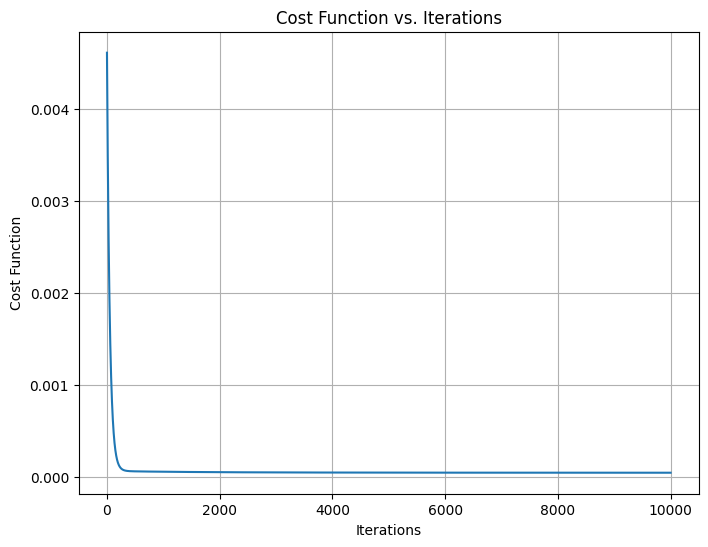

In [10]:
# Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(J_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.grid(True)
plt.show()

In [13]:
# Make predictions on the scaled test data
# Ensure X_test_scaled has the same columns as X_train_scaled
X_test_scaled = X_test_scaled[X_train_scaled.columns]
y_pred = X_test_scaled @ w + b

print("First 5 predictions:")
display(y_pred.head())

First 5 predictions:


,0
0,0.085309
1,0.101807
2,0.093720
3,0.100540
4,0.075624


In [14]:
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(y_pred, columns=['Predicted Catch Quality Rating'])

# Save the predictions to a CSV file
predictions_df.to_csv('quality_predictions.csv', index=False)

print("Predictions saved to 'quality_predictions.csv'")

Predictions saved to 'quality_predictions.csv'


In [15]:
from sklearn.metrics import mean_squared_error

# Making predictions on the scaled training data
y_train_pred = X_train_scaled @ w + b

# Calculating Mean Squared Error(MSE) on the training data
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"Mean Squared Error on Training Data: {mse_train:.4f}")

Mean Squared Error on Training Data: 0.0001


In [16]:
import numpy as np
absolute_difference = np.abs(y_train - y_train_pred)
# Calculate and print percentages within different tolerances
for percentage in [5, 10, 15]:
    tolerance = (percentage / 100) * np.abs(y_train)
    within_tolerance = absolute_difference <= tolerance
    count_within_tolerance = np.sum(within_tolerance)
    percentage_within_tolerance = (count_within_tolerance / len(y_train)) * 100
    print(f"Percentage of predictions within {percentage}% of actual values: {percentage_within_tolerance:.2f}%")

Percentage of predictions within 5% of actual values: 70.48%
Percentage of predictions within 10% of actual values: 83.08%
Percentage of predictions within 15% of actual values: 94.44%
